# Data transfer rates for the SLAC -> NERSC transfers

Files are moved using XRootD from SLAC (psexport) to NERSC (dtn). The tranfer rates are the
file size divided by the elapsed time.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [27]:
fn = "/home/wilko/data/nersc_trans.20180621T001600.csv"
d = pd.read_csv(fn)
d.rate /= pow(2,20)
d.fsize /= pow(2,30)
d['elap'] = d.stopt - d.startt

In [28]:
d.head()

,startt,stopt,fsize,rate,rc,fn,elap
0,1.498435e+09,1.498435e+09,0.848087,188.791540,0,/psdm/cxi/cxi08216/xtc/e837-r0027-s00-c00.xtc,4.6
1,1.498435e+09,1.498435e+09,1.526408,214.115362,0,/psdm/cxi/cxilp6715/xtc/e983-r0068-s00-c00.xtc,7.3
2,1.498435e+09,1.498436e+09,92.017381,271.544086,0,/psdm/cxi/cxilp6715/xtc/e983-r0069-s00-c00.xtc,347.0
3,1.498436e+09,1.498436e+09,69.294308,262.125496,0,/psdm/cxi/cxilp6715/xtc/e983-r0069-s00-c01.xtc,270.7
4,1.498436e+09,1.498437e+09,92.013082,225.896419,0,/psdm/cxi/cxilp6715/xtc/e983-r0070-s00-c00.xtc,417.1


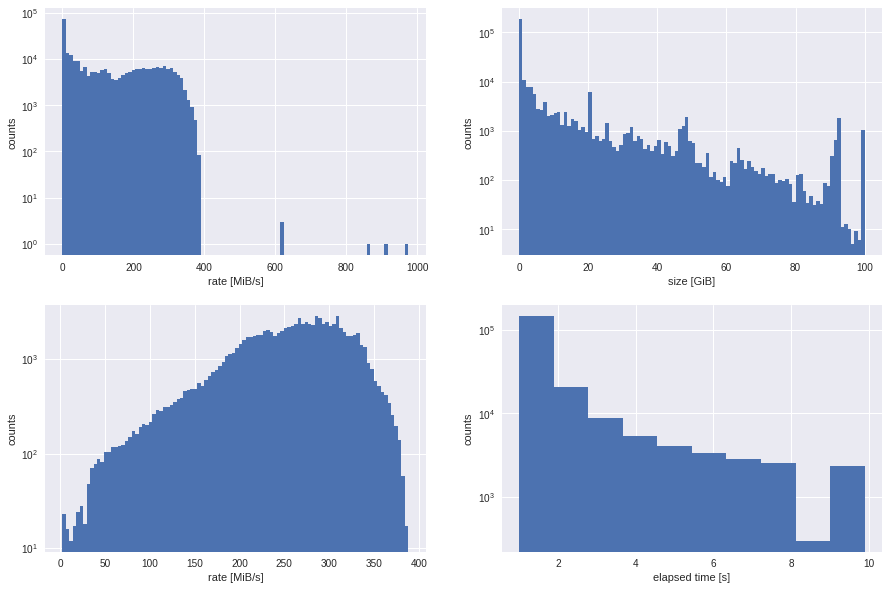

In [29]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(2,2,1)
d.loc[ d.rate < 1000 ].rate.hist(bins=100)
plt.xlabel("rate [MiB/s]")
plt.ylabel("counts")
ax.set_yscale("log")

ax = fig.add_subplot(2,2,2)
d.loc[ d.rate < 1000 ].fsize.hist(bins=100)
plt.xlabel("size [GiB]")
plt.ylabel("counts")
ax.set_yscale("log")

ax = fig.add_subplot(2,2,3)
d.loc[ (d.rate < 1000) & (d.rate < 600) & (d.fsize > 1.0) ].rate.hist(bins=100)
plt.xlabel("rate [MiB/s]")
plt.ylabel("counts")
ax.set_yscale("log")

ax = fig.add_subplot(2,2,4)
d.loc[ (d.elap < 10) ].elap.hist(bins=10)
plt.xlabel("elapsed time [s]")
plt.ylabel("counts")
ax.set_yscale("log")
